In [1]:
import matplotlib.pyplot as plt
from PIL import Image as PILImage
import requests
import io
import random
import copy
from typing import Type

In [2]:
img_bytes = requests.get(
    "https://i.pinimg.com/564x/dc/e5/51/dce5519c29e854e877d14061b3c823f3.jpg", timeout=8
).content
img = PILImage.open(io.BytesIO(img_bytes))
img = img.resize((900, 900))

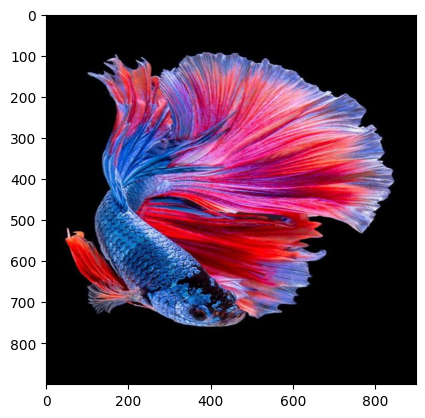

In [3]:
plt.imshow(img)

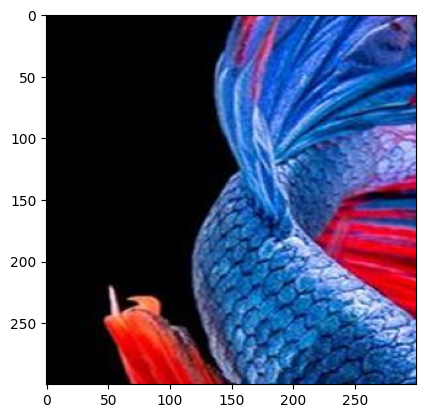

In [4]:
tiles = []

for i in range(0, 3):
    row = []
    for j in range(0, 3):
        box = (j * 300, i * 300, (j + 1) * 300, (i + 1) * 300)
        row.append(img.crop(box))
    tiles.append(row)

plt.imshow(tiles[1][0])

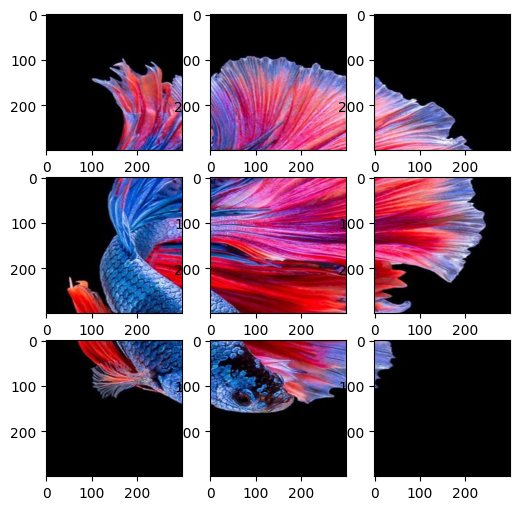

In [5]:
fig = plt.figure(figsize=(6, 6))
i = 1
for row in tiles:
    for tile in row:
        _ = fig.add_subplot(len(tiles), len(tiles[0]), i)
        _ = plt.imshow(tile)
        i += 1

In [6]:
class Problem:
    def __init__(self):
        self.goal = None

    # Lấy trạng thái hiện tại
    def get_state(self):
        pass

    # Lấy các hành động có thể thực hiện
    def get_pos_actions(self):
        pass

    # Hàm chuyển tiếp(transition: Thực hiện hành động
    def action(self, actions):
        pass

    # Hàm trả về chi phí hành động
    def cost(self, action):
        pass

In [7]:
class Eight_puzzle(Problem):
    def __init__(self, img, empty_pos):
        Problem.__init__(self)
        self.w = 3
        self.h = 3
        self.tiles = []

        img_w, img_h = img.size
        self.tile_w = img_w / self.w
        self.tile_h = img_h / self.h

        # Tạo các ô hình với 2 thuộc tính là img (hình) và true_pos chứa vị trí đúng của ô đó.
        for i in range(0, self.w):
            row = []
            for j in range(0, self.h):
                # Trường hợp ô tại(i, j) là rỗng.
                if (i, j) == empty_pos:
                    row.append({"img": None, "true_pos": (i, j)})
                else:
                    # Với ô hình, thực hiện cắt ảnh và thêm vào hàng.
                    box = (
                        j * self.tile_w,
                        i * self.tile_h,
                        (j + 1) * self.tile_w,
                        (i + 1) * self.tile_h,
                    )
                    row.append({"img": img.crop(box), "true_pos": (i, j)})
            self.tiles.append(row)

        self.goal = self.get_state()

    def get_state(self):
        Problem.get_state(self)
        # rows là ma trận chứa các ô.
        rows = []
        cur_row = []
        # Quét từng ô hình để bỏ vào rows.
        for row in self.tiles:
            cur_row = []
            for tile in row:
                # Trạng thái có dạng(i, j, is_empty). Nếu tile['img'] là None, is_empty == True
                cur_row.append((*tile["true_pos"], tile["img"] is None))
            rows.append(tuple(cur_row))
        return tuple(rows)

    def get_pos_actions(self):
        # Hàm lấy hành động khả thi. Không nhất thiết hành động khả thi có đủ lên, xuống, trái, phải. Ví dụ: Nếu ô trống ở góc dưới bên phải, nó không thể thực hiện "phải" hoặc "xuống".
        Problem.get_pos_actions(self)
        actions = []
        pos = self.get_empty_tile_pos()

        x, y = pos

        if x < self.w - 1:
            actions.append("right")
        if x > 0:
            actions.append("left")
        if y < self.h - 1:
            actions.append("down")
        if y > 0:
            actions.append("up")

        return actions

    def action(self, actions):
        Problem.action(self, actions)
        for action in actions:
            if action not in self.get_pos_actions():
                continue

            # Lấy vị trí ô trống.
            x, y = self.get_empty_tile_pos()
            # x2, y2 là tọa độ mới của ô trống.
            x2, y2 = x, y
            match action:
                case "left":
                    x2 = x - 1
                case "right":
                    x2 = x + 1
                case "up":
                    y2 = y - 1
                case "down":
                    y2 = y + 1

            # Hoán đổi ô trống (x, y) sang ô (x2, y2)
            self.__swap((x, y), (x2, y2))

    def cost(self, action):
        Problem.cost(self, action)
        return 1

    def get_empty_tile_pos(self):
        # Tìm vị trí ô trống, trả về vị trí đó.
        for i, row in enumerate(self.get_state()):
            for j, tile_state in enumerate(row):
                if tile_state[2]:
                    return j, i

    def __swap(self, pos1, pos2):
        x1, y1 = pos1
        x2, y2 = pos2
        t = self.tiles[y1][x1]
        self.tiles[y1][x1] = self.tiles[y2][x2]
        self.tiles[y2][x2] = t

    def shuffle(self, n):
        for x in range(0, n):
            action = random.choice(self.get_pos_actions())
            self.action([action])

    def show(self):
        output = ""
        for row in self.get_state():
            output += str(row) + "\n"
        return output

    def show_imgs(self, figsize):
        fig = plt.figure(figsize=figsize)

        i = 1
        for row in self.tiles:
            for tile in row:
                fig.add_subplot(len(self.tiles), len(self.tiles[0]), i)
                tile_img = (
                    tile["img"] if tile["img"] else PILImage.new("RGB", (300, 300))
                )
                _ = plt.imshow(tile_img)
                i += 1

        return fig

((0, 0, False), (0, 1, False), (0, 2, False))
((1, 0, False), (1, 1, False), (1, 2, False))
((2, 0, False), (2, 1, False), (2, 2, True))

-------
((0, 0, False), (0, 1, False), (0, 2, False))
((1, 0, False), (2, 2, True), (1, 2, False))
((2, 0, False), (1, 1, False), (2, 1, False))



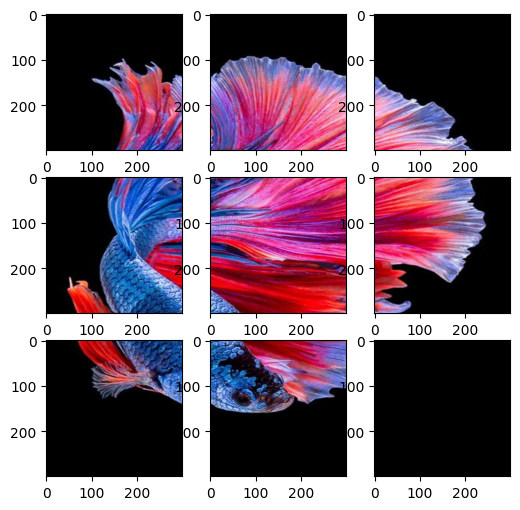

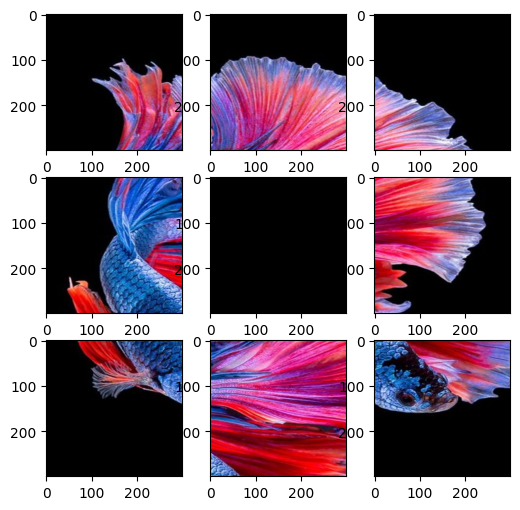

In [8]:
puzzle = Eight_puzzle(img, (2, 2))
print(puzzle.show())
_ = puzzle.show_imgs((6, 6))
print("-------")

# Thử di chuyển ô trống sang trái rồi lên trên.
puzzle.action(["left", "up"])
print(puzzle.show())
_ = puzzle.show_imgs((6, 6))

None
(((1, 0, False), (0, 2, False), (2, 2, True)), ((0, 1, False), (0, 0, False), (1, 2, False)), ((2, 0, False), (1, 1, False), (2, 1, False)))


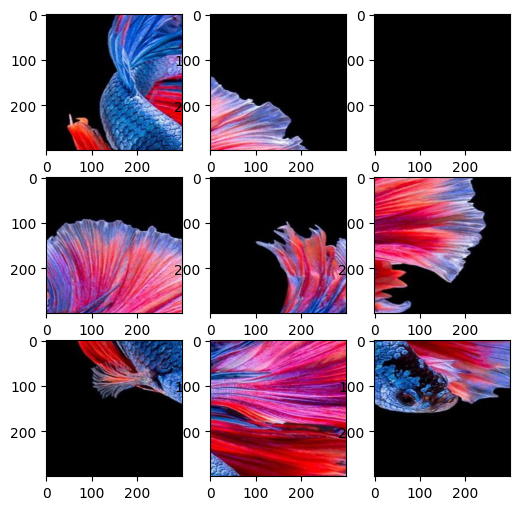

In [9]:
print(puzzle.shuffle(50))
print(puzzle.get_state())
_ = puzzle.show_imgs((6, 6))

In [10]:
class Node:
    def __init__(self, state, cost, parent_node, action):
        self.state = state
        self.cost = cost
        self.action = action
        self.parent_node = parent_node

    def get_actions(self):
        actions = []
        node = self

        while node:
            if node.action:
                actions.append(node.action)
            node = node.parent_node

        return list(reversed(actions))

In [11]:
class Problem_solver:
    def __init__(self):
        pass

    def train(self, problem: Type[Problem]):
        pass

    def solve(self):
        pass

In [12]:
class Bfs_solver(Problem_solver):
    def __init__(self):
        Problem_solver.__init__(self)

    def train(self, problem: Type[Problem]):
        Problem_solver.train(self, problem)
        self.problem = problem

    def solve(self):
        Problem_solver.solve(self)
        node = self.__search()
        return node.get_actions() if node else None

    def __search(self):
        init_node = Node(self.problem.get_state(), 0, None, None)
        frontiers = [init_node]
        reached = {init_node.state: init_node}
        while len(frontiers):
            node = frontiers.pop(0)
            if node.state == self.problem.goal:
                return node

            for child_node in self.expand(node):
                state = child_node.state
                if state not in reached or child_node.cost < reached[state].cost:
                    reached[state] = child_node
                    frontiers.append(child_node)
        return None

    def get_problem_after_action(self, actions):
        problem = copy.deepcopy(self.problem)
        problem.action(actions)
        return problem

    def expand(self, node):
        actions = node.get_actions()
        problem = self.get_problem_after_action(actions)
        pos_actions = list(problem.get_pos_actions())

        for action in pos_actions:
            action_cost = problem.cost(action)
            problem.action([action])
            cur_state = problem.get_state()
            yield Node(cur_state, node.cost + action_cost, node, action)
            problem = self.get_problem_after_action(actions)

In [13]:
puzzle.shuffle(50)

solver = Bfs_solver()
solver.train(puzzle)
actions = solver.solve()

print(actions)

['right', 'down', 'left', 'up', 'right', 'down', 'right', 'up', 'left', 'left', 'down', 'down', 'right', 'up', 'up', 'left', 'down', 'right', 'down', 'right']


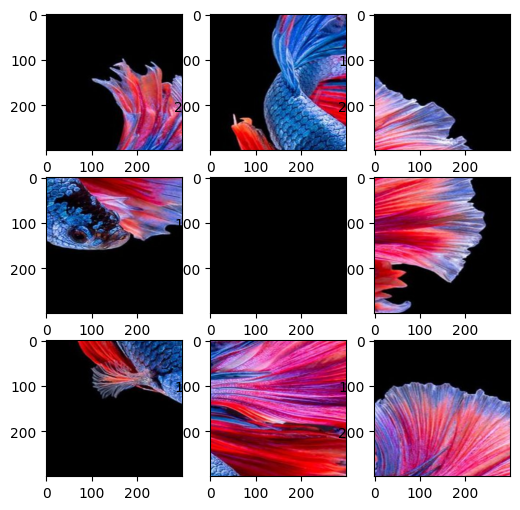

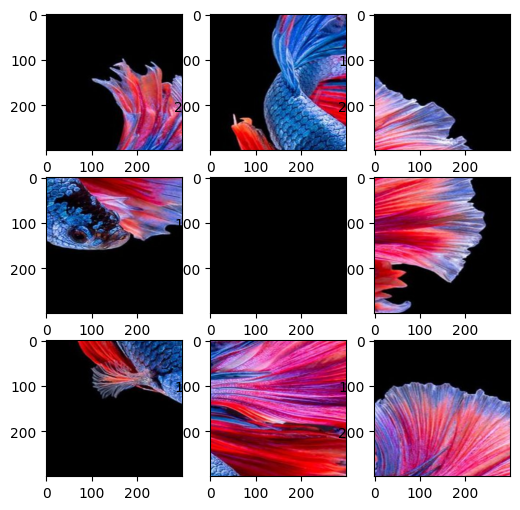

In [15]:
puzzle.action([])
puzzle.show_imgs((6, 6))